In [108]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
page = 0
more_pages = True
master_data = []

while more_pages:
    url = "https://free-nba.p.rapidapi.com/stats?seasons[]=2020&seasons[]=2019&seasons[]=2018"
    
    params = {
        "page":page,
        "per_page":"100"
    }
    
    headers = {
        'x-rapidapi-host': "free-nba.p.rapidapi.com",
        'x-rapidapi-key': "0a58c448e1msh42682201a62cc30p1ea6c2jsnb4992c5a1579"
    }

    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        for record in response.json()['data']:
            try:
                entry = {}
                entry['player_id'] = record['player']['id']
                entry['first_name'] = record['player']['first_name']
                entry['last_name'] = record['player']['last_name']
                entry['steals'] = record['stl']
                entry['defensive_rebounds'] = record['dreb']
                entry['blocks'] = record['blk']
                entry['game_id'] = record['game']['id']
                entry['game_date'] = record['game']['date']
                entry['season'] = record['game']['season']

                master_data.append(entry)
            except Exception as e:
                print(f"Failed. Response: {e}")
        
        if response.json()['meta']['next_page'] == None:
            more_pages = False
        
        #print(f"Page {page} out of {response.json()['meta']['total_pages']} complete.")
        page += 1
    else:
        #print(f"Waiting 30 seconds. Skipping page {page}")
        time.sleep(30)

Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable
Failed. Response: 'NoneType' object is not subscriptable


In [42]:
master_datadf=pd.DataFrame(master_data)

In [81]:
df=master_datadf

df['player']=df['first_name']+' '+ df['last_name']

df=df[['player','steals','defensive_rebounds','blocks','season']]

df=df.loc[df['season'] == 2018]

df=df.groupby(by='player').mean().round(2)

df.reset_index(inplace=True)

df.dropna(inplace=True)

df


,player,steals,defensive_rebounds,blocks,season
0,Aaron Gordon,0.78,5.66,0.67,2018
1,Aaron Holiday,0.35,0.94,0.19,2018
2,Abdel Nader,0.26,1.43,0.22,2018
3,Al Horford,0.92,5.34,1.16,2018
4,Al-Farouq Aminu,0.75,5.69,0.42,2018
...,...,...,...,...,...
524,Zach Collins,0.29,2.57,0.88,2018
525,Zach LaVine,0.93,3.76,0.36,2018
527,Zaza Pachulia,0.30,2.08,0.18,2018
528,Zhaire Smith,0.31,0.85,0.15,2018


In [82]:
df1=master_datadf

df1['player']=df1['first_name']+' '+ df1['last_name']

df1=df1[['player','steals','defensive_rebounds','blocks','season']]

df1=df1.loc[df1['season'] == 2019]

df1=df1.groupby(by='player').mean().round(2)

df1.reset_index(inplace=True)

df1.dropna(inplace=True)

df1

,player,steals,defensive_rebounds,blocks,season
0,Aaron Gordon,0.82,5.95,0.63,2019
1,Aaron Holiday,0.78,1.78,0.22,2019
2,Abdel Nader,0.34,1.24,0.31,2019
3,Adam Mokoka,0.22,0.17,0.00,2019
4,Admiral Schofield,0.18,0.91,0.09,2019
...,...,...,...,...,...
534,Zach LaVine,1.45,4.13,0.47,2019
535,Zach Norvell Jr.,0.25,0.75,0.00,2019
536,Zhaire Smith,0.30,0.20,0.00,2019
537,Zion Williamson,0.64,3.44,0.36,2019


In [83]:
df2=master_datadf

df2['player']=df2['first_name']+' '+ df2['last_name']

df2=df2[['player','steals','defensive_rebounds','blocks','season']]

df2=df2.loc[df2['season'] == 2020]

df2=df2.groupby(by='player').mean().round(2)

df2.reset_index(inplace=True)

df2.dropna(inplace=True)

df2

,player,steals,defensive_rebounds,blocks,season
0,Aaron Gordon,0.58,3.69,0.57,2020
1,Aaron Holiday,0.66,1.07,0.18,2020
2,Aaron Nesmith,0.22,1.45,0.14,2020
3,Abdel Nader,0.21,1.25,0.19,2020
4,Adam Mokoka,0.05,0.11,0.03,2020
...,...,...,...,...,...
540,Yuta Watanabe,0.38,1.81,0.28,2020
541,Zach Collins,0.00,0.00,0.00,2020
542,Zach LaVine,0.81,4.36,0.47,2020
543,Zeke Nnaji,0.12,0.67,0.05,2020


In [84]:
kagle = pd.read_csv('all_seasons_2.csv')
kagledf = pd.DataFrame(kagle)
kagledf=kagledf[['player_name','team_abbreviation','age','player_height','country','pts','reb','ast','season']]

In [85]:
kagledf1=kagledf[kagledf['season'].str.contains('2018-19')]

In [86]:
kagledf2=kagledf[kagledf['season'].str.contains('2019-20')]

In [87]:
kagledf3=kagledf[kagledf['season'].str.contains('2020-21')]

In [88]:
final2018=pd.merge(kagledf1,df,how='inner',left_on='player_name',right_on='player')

final2018=final2018[['player','team_abbreviation','age','player_height','country','pts','reb','ast','steals','defensive_rebounds','blocks','season_y']]

final2018 = final2018.rename(columns={'season_y': 'season','pts':'points','reb':'rebounds','ast':'assists'})

final2018

,player,team_abbreviation,age,player_height,country,points,rebounds,assists,steals,defensive_rebounds,blocks,season
0,Mike Conley,MEM,31.0,185.42,USA,21.1,3.4,6.4,1.17,2.44,0.32,2018
1,Mike Muscala,LAL,27.0,210.82,USA,7.0,3.8,1.2,0.29,2.37,0.54,2018
2,Mike Scott,PHI,30.0,203.20,USA,5.8,3.5,0.8,0.31,2.89,0.17,2018
3,Miles Bridges,CHA,21.0,200.66,USA,7.5,4.0,1.2,0.70,3.22,0.67,2018
4,Miles Plumlee,ATL,30.0,210.82,USA,4.4,2.2,0.9,0.31,1.31,0.25,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
514,Isaac Humphries,ATL,21.0,213.36,Australia,3.0,2.2,0.0,0.25,1.38,0.00,2018
515,Jake Layman,POR,25.0,205.74,USA,7.6,3.1,0.7,0.39,1.95,0.38,2018
516,Brandon Knight,CLE,27.0,190.50,USA,6.8,1.5,1.8,0.50,1.24,0.04,2018
517,Zhou Qi,HOU,23.0,215.90,China,2.0,0.0,0.0,0.00,0.00,0.00,2018


In [89]:
final2019=pd.merge(kagledf2,df1,how='inner',left_on='player_name',right_on='player')

final2019=final2019[['player','team_abbreviation','age','player_height','country','pts','reb','ast','steals','defensive_rebounds','blocks','season_y']]

final2019 = final2019.rename(columns={'season_y': 'season','pts':'points','reb':'rebounds','ast':'assists'})

final2019

,player,team_abbreviation,age,player_height,country,points,rebounds,assists,steals,defensive_rebounds,blocks,season
0,Fred VanVleet,TOR,26.0,185.42,USA,17.6,3.8,6.6,1.72,3.42,0.36,2019
1,Furkan Korkmaz,PHI,22.0,200.66,Turkey,9.8,2.3,1.1,0.55,2.05,0.21,2019
2,Gabe Vincent,MIA,24.0,190.50,USA,2.4,0.6,0.7,0.25,0.25,0.00,2019
3,Garrett Temple,BKN,34.0,195.58,USA,10.3,3.5,2.5,0.78,2.99,0.45,2019
4,Garrison Mathews,WAS,23.0,195.58,USA,5.4,1.3,0.6,0.40,0.90,0.05,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
517,Marques Bolden,CLE,22.0,208.28,USA,0.0,2.0,0.0,0.25,0.50,0.00,2019
518,Marko Guduric,MEM,25.0,198.12,Serbia,3.9,1.7,1.0,0.16,0.81,0.11,2019
519,Markieff Morris,LAL,30.0,203.20,USA,9.7,3.8,1.3,0.41,2.67,0.22,2019
520,Mason Plumlee,DEN,30.0,210.82,USA,7.2,5.2,2.5,0.42,2.87,0.52,2019


In [112]:
final2020=pd.merge(kagledf3,df2,how='inner',left_on='player_name',right_on='player')

final2020=final2020[['player','team_abbreviation','age','player_height','country','pts','reb','ast','steals','defensive_rebounds','blocks','season_y']]

final2020 = final2020.rename(columns={'season_y': 'season','pts':'points','reb':'rebounds','ast':'assists'})

final2020

,player,team_abbreviation,age,player_height,country,points,rebounds,assists,steals,defensive_rebounds,blocks,season
0,Yogi Ferrell,LAC,28.0,182.88,USA,5.6,1.9,2.2,0.21,0.50,0.09,2020
1,Zion Williamson,NOP,20.0,200.66,USA,27.0,7.2,3.7,0.92,4.42,0.63,2020
2,Zeke Nnaji,DEN,20.0,205.74,USA,3.2,1.5,0.2,0.12,0.67,0.05,2020
3,Zach LaVine,CHI,26.0,195.58,USA,27.4,5.0,4.9,0.81,4.36,0.47,2020
4,Yuta Watanabe,TOR,26.0,205.74,Japan,4.4,3.2,0.8,0.38,1.81,0.28,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
528,Matt Thomas,UTA,26.0,193.04,USA,3.1,1.0,0.4,0.05,0.46,0.00,2020
529,Matthew Dellavedova,CLE,30.0,190.50,Australia,2.8,1.8,4.5,0.31,1.38,0.08,2020
530,Maurice Harkless,SAC,28.0,200.66,USA,5.2,2.4,1.2,0.43,1.10,0.30,2020
531,Max Strus,MIA,25.0,195.58,USA,6.1,1.1,0.6,0.16,0.52,0.03,2020


<AxesSubplot:title={'center':'2018'}, xlabel='player'>

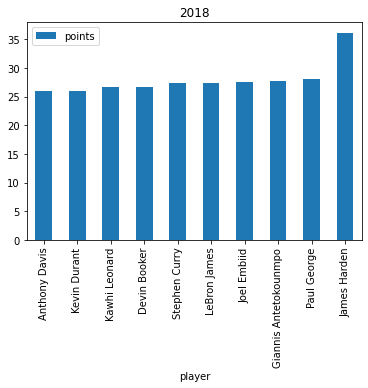

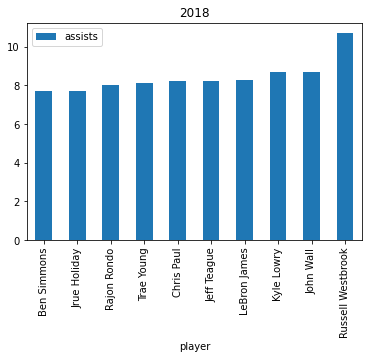

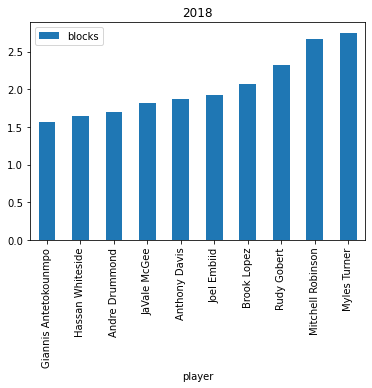

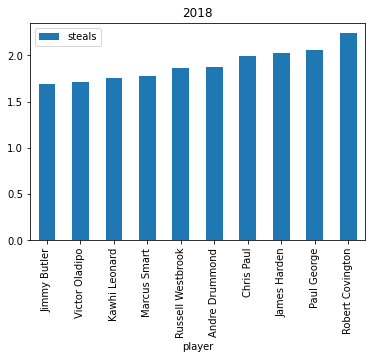

In [217]:
Plot18=final2018.sort_values(by=['points']).tail(10)
Plot18.plot(x ='player', y='points', kind = 'bar',title= '2018')

Plot18=final2018.sort_values(by=['assists']).tail(10)
Plot18.plot(x ='player', y='assists', kind = 'bar',title= '2018')

Plot18=final2018.sort_values(by=['blocks']).tail(10)
Plot18.plot(x ='player', y='blocks', kind = 'bar',title= '2018')

Plot18x=final2018.sort_values(by=['steals']).tail(10)
Plot18x.plot(x ='player', y='steals', kind = 'bar',title= '2018')

<AxesSubplot:title={'center':'2019'}, xlabel='player'>

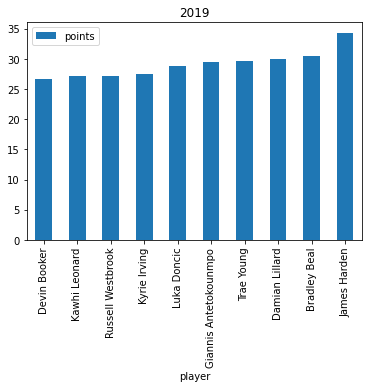

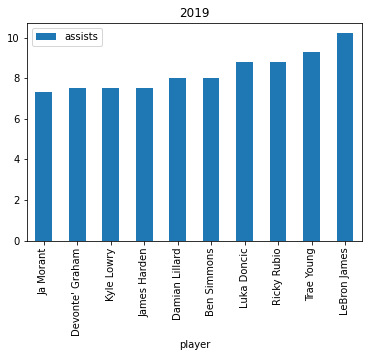

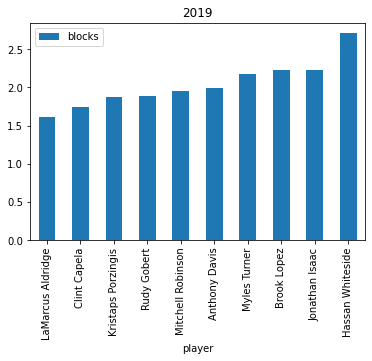

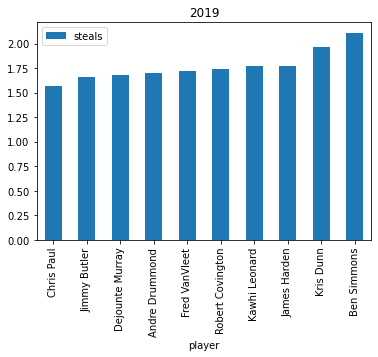

In [223]:
Plot19=final2019.sort_values(by=['points']).tail(10)
Plot19.plot(x ='player', y='points', kind = 'bar',title= '2019')

Plot19=final2019.sort_values(by=['assists']).tail(10)
Plot19.plot(x ='player', y='assists', kind = 'bar',title= '2019')

Plot19=final2019.sort_values(by=['blocks']).tail(10)
Plot19.plot(x ='player', y='blocks', kind = 'bar',title= '2019')

Plot19x=final2019.sort_values(by=['steals']).tail(10)
Plot19x.plot(x ='player', y='steals', kind = 'bar',title= '2019')

<AxesSubplot:title={'center':'2020'}, xlabel='player'>

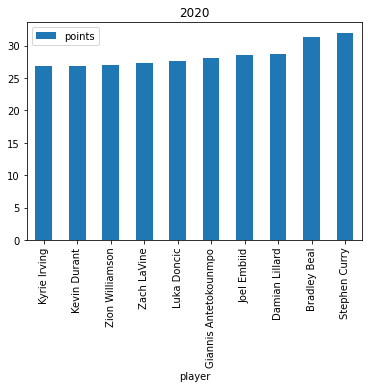

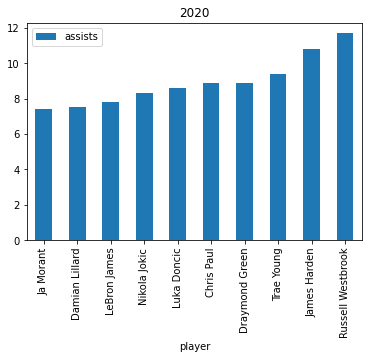

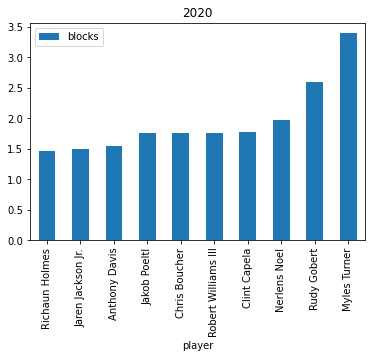

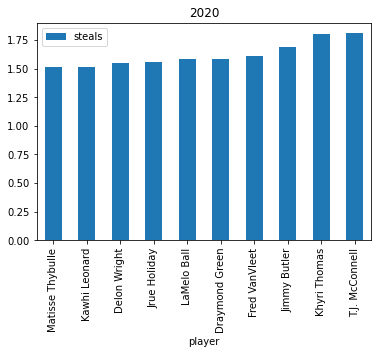

In [220]:
Plot20=final2020.sort_values(by=['points']).tail(10)
Plot20.plot(x ='player', y='points', kind = 'bar',title= '2020')

Plot20=final2020.sort_values(by=['assists']).tail(10)
Plot20.plot(x ='player', y='assists', kind = 'bar',title= '2020')

Plot20=final2020.sort_values(by=['blocks']).tail(10)
Plot20.plot(x ='player', y='blocks', kind = 'bar',title= '2020')

Plot20x=final2020.sort_values(by=['steals']).tail(10)
Plot20x.plot(x ='player', y='steals', kind = 'bar',title= '2020')

In [208]:
pie=final2018['country'].value_counts()

In [209]:
pie=pd.DataFrame(pie)

pie.reset_index(inplace=True)

In [210]:
pie = pie.rename(columns={'index': 'country','country':'players'})

In [211]:
fig = px.funnel(pie, x='country', y='players')
fig.show() 

In [212]:
pie1=final2019['country'].value_counts()
pie1=pd.DataFrame(pie1)
pie1.reset_index(inplace=True)
pie1 = pie1.rename(columns={'index': 'country','country':'players'})

In [213]:
fig1 = px.funnel(pie1, x='country', y='players')
fig1.show()

In [214]:
pie2=final2020['country'].value_counts()
pie2=pd.DataFrame(pie2)
pie2.reset_index(inplace=True)
pie2 = pie2.rename(columns={'index': 'country','country':'players'})

In [215]:
fig2 = px.funnel(pie2, x='country', y='players')
fig2.show()